In [ ]:
# Install dependencies on colab
!pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!ls

sample_data


In [ ]:
# Connect to google drive to load images and save model
import fastbook
fastbook.setup_book()

ModuleNotFoundError: No module named 'fastbook'

In [ ]:
from fastai.vision.all import *

# 1. Data loading and augmentation

Create a DataBlock and DataLoaders using:
- Training and validation images collected in a2
- Use `set_seed()` to obtain reproducible results.
- Use `item_tfms` and/or `batch_tfms`. Set `min_scale` so that gestures are still visible
- Use a batch size of 32

Show a training and a validation batch.
Show augmentations, i.e. `show_batch()` with `unique=True`.

In [ ]:
from fastbook import *
from fastai.vision.widgets import *
path = Path("/content/gdrive/MyDrive/gestures")
!ls {path/"train/down"}  # Lists files to confirm access


00000000.jpg  00000007.jpg  00000014.jpg  00000021.jpg	00000028.jpg  00000035.jpg  00000042.jpg
00000001.jpg  00000008.jpg  00000015.jpg  00000022.jpg	00000029.jpg  00000036.jpg  00000043.jpg
00000002.jpg  00000009.jpg  00000016.jpg  00000023.jpg	00000030.jpg  00000037.jpg  00000044.jpg
00000003.jpg  00000010.jpg  00000017.jpg  00000024.jpg	00000031.jpg  00000038.jpg  00000045.jpg
00000004.jpg  00000011.jpg  00000018.jpg  00000025.jpg	00000032.jpg  00000039.jpg  00000046.jpg
00000005.jpg  00000012.jpg  00000019.jpg  00000026.jpg	00000033.jpg  00000040.jpg  00000047.jpg
00000006.jpg  00000013.jpg  00000020.jpg  00000027.jpg	00000034.jpg  00000041.jpg  00000048.jpg


In [ ]:
set_seed(20, True)
# Define DataBlock
gestures = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Image as input, category as output
    get_items=get_image_files_sorted,  # Get all image files
    splitter=GrandparentSplitter(train_name='train', valid_name='valid'),  #train-valid split
    get_y=parent_label,  # Label from folder name
    item_tfms=RandomResizedCrop(224, min_scale=0.5),  # Resize for uniformity
    batch_tfms=aug_transforms(do_flip=True, flip_vert=False, max_rotate=10, max_zoom=1.1, max_lighting=0.2, max_warp=0.2)
)

# Create DataLoaders
dls = gestures.dataloaders(path, bs=32)


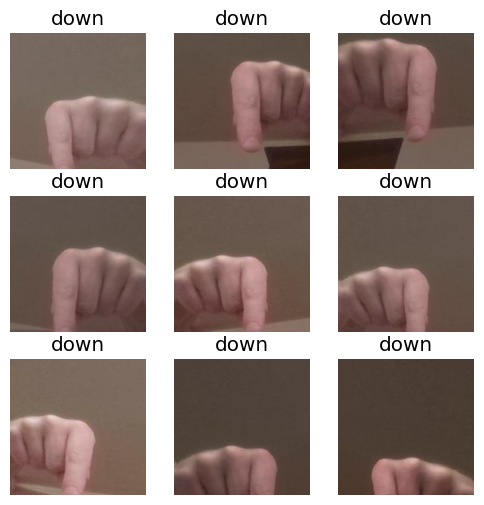

In [ ]:
# Show a batch of training images
set_seed(2004, True)
train_ds = dls.train
train_ds.show_batch(max_n=9, nrows=3, unique=True, figsize=(6,6))

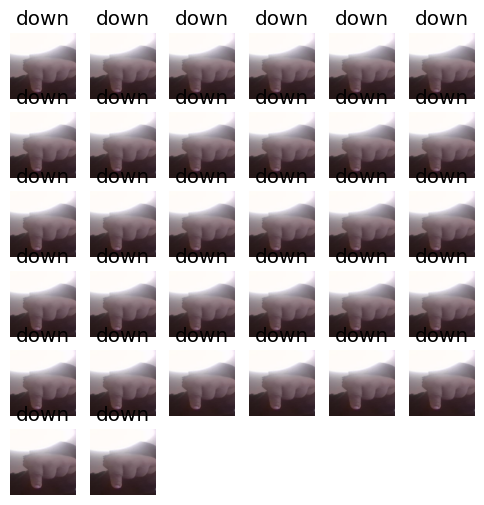

In [ ]:
# Show a batch of validation images
set_seed(2008, True)
valid_ds = dls.valid
valid_ds.show_batch(max_n=32, nrows=6, unique=True, figsize=(6,6))

### Question 1: What type of item and batch transforms did you use? Can you spot any problems in the training set augmentations, e.g. gestures not visible?
*I used item_tmfs, with random crop, and a minimum scale of 0.5. I also used batch_tmfs with augmented transform to enable horizontal flipping, but prevent vertical flipping of the images. The ttransform also adjusts the brightness and contrast of the images randomly, and warps the perspective randomly as well.*


# 2. Train the classifier

## 2.1 Impact of learning rate
With:
- Same `set_seed()` as above
- Re-creating the same DataLoaders as above
- ResNet18 architecture.
- error rate as metric.

Use three learning rates:
- small: 3e-5
- medium: 3e-3
- large: 1e-1

Train the model with each learning rate using `fine_tune` with 10-15 epochs


In [ ]:
print('Number of epoch: 15 , learning rate: small')
set_seed(20,true)

dls = gestures.dataloaders(path, bs= 32)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(15, 3e-5)


Number of epoch: 15 , learning rate: small


NameError: name 'set_seed' is not defined

In [ ]:
print('Number of epoch: 15 , learning rate: medium')
set_seed(20,true)

dls = gestures.dataloaders(path, bs= 32)
learn_2 = vision_learner(dls, resnet18, metrics=error_rate)
learn_2.fine_tune(15, 3e-3)

Number of epoch: 15 , learning rate: medium


epoch,train_loss,valid_loss,error_rate,time
0,2.253463,0.712560,0.210526,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.581458,0.489148,0.210526,00:03
1,0.462507,0.265454,0.063158,00:03
2,0.350452,0.217634,0.073684,00:03
3,0.273164,0.192721,0.073684,00:02
4,0.217035,0.221986,0.073684,00:02
5,0.173336,0.224620,0.084211,00:02
6,0.145902,0.222402,0.084211,00:04
7,0.132015,0.190016,0.063158,00:02
8,0.111934,0.182431,0.073684,00:02
9,0.103694,0.212511,0.073684,00:02


In [ ]:
print('Number of epoch: 15 , learning rate: large')
set_seed(20,true)

dls = gestures.dataloaders(path, bs= 32)
learn_3 = vision_learner(dls, resnet18, metrics=error_rate)
learn_3.fine_tune(15, 1e-1)

Number of epoch: 15 , learning rate: large


epoch,train_loss,valid_loss,error_rate,time
0,1.019161,2.438510,0.263158,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.682757,5.021034,0.347368,00:02
1,1.242944,3.892803,0.336842,00:03
2,1.034918,19.415918,0.610526,00:02
3,0.910912,14.352431,0.494737,00:02
4,0.846749,39.776459,0.673684,00:02
5,0.936221,31.721226,0.589474,00:02
6,1.084486,42.252621,0.442105,00:03
7,0.980369,0.011374,0.010526,00:02
8,0.859937,3.007938,0.242105,00:02
9,0.774600,0.507064,0.042105,00:02


In [ ]:
print('Number of epoch: 15 , learning rate: small')
set_seed(20,true)

dls = gestures.dataloaders(path, bs= 32)
learn4 = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10, 3e-5)

Number of epoch: 15 , learning rate: small


NameError: name 'set_seed' is not defined

In [ ]:
print('Number of epoch: 15 , learning rate: small')
set_seed(20,true)

dls = gestures.dataloaders(path, bs= 32)
learn5 = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(12, 3e-3)

In [ ]:
print('Number of epoch: 15 , learning rate: small')
set_seed(20,true)

dls = gestures.dataloaders(path, bs= 32)
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(15, 1e-5)

### Question 2: Which training run resulted in the best model? State number of epochs and final error rate values for all learning rates and identify the best model.
*My best training model is learn_2, as has the lowest error rate of 0.2105. The final error rate for the large learning rate is 0.26315. The learning rate of the medium learning rate is 0.2105. The learning rate of the low learning rate is 0.705.*


### Question 3: Did any models overfit? Include your reasoning.
*The models with a medium and high learning rate overfitted, as they have a valid loss that is significantly higher than their error rate.*


# 3. Analyze model performance
- Retrain the best model from above.
- Plot the confusion matrix.
- Plot 10 top losses

In [ ]:
set_seed(20,true)

dls = gestures.dataloaders(path, bs= 32)
learn_2 = vision_learner(dls, resnet18, metrics=error_rate)
learn_2.fine_tune(15, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.253463,0.712560,0.210526,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.581458,0.489148,0.210526,00:02
1,0.462507,0.265454,0.063158,00:02
2,0.350452,0.217634,0.073684,00:02
3,0.273164,0.192721,0.073684,00:03
4,0.217035,0.221986,0.073684,00:02
5,0.173336,0.224620,0.084211,00:02
6,0.145902,0.222402,0.084211,00:02
7,0.132015,0.190016,0.063158,00:03
8,0.111934,0.182431,0.073684,00:03
9,0.103694,0.212511,0.073684,00:02


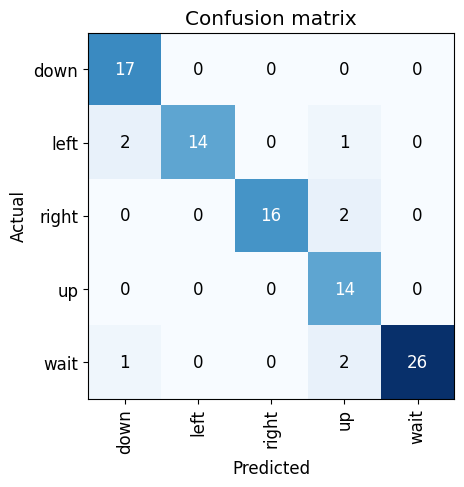

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_2)
interp.plot_confusion_matrix()

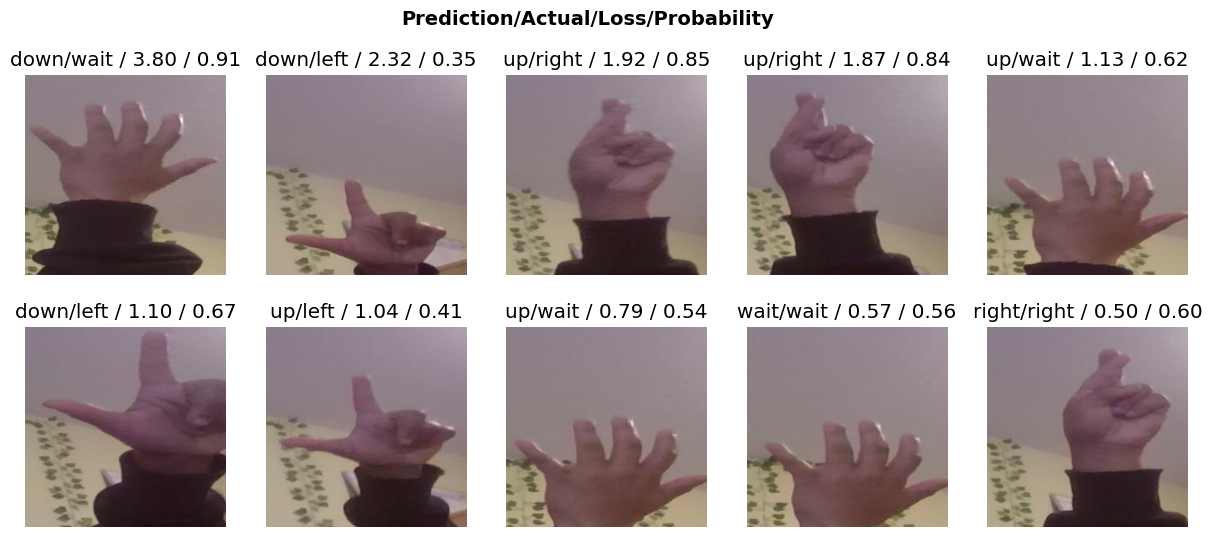

In [ ]:
interp.plot_top_losses(10, nrows=2)

### Question 4: With which gestures does your model have the most problems with?
*The model had the most problems with theup gesture, as it made the most errors with predicting it.*


# 4. Save the best model to file
Save the model using `learn.export()` as `.pkl` file. Verify that the model can be reloaded and used to make predictions.

In [ ]:
data_path = Path('/content/gdrive/MyDrive/')

In [ ]:
learn_2.export(fname=data_path/'digit_model.pkl')

In [ ]:
data_path.ls()

(#21) [Path('/content/gdrive/MyDrive/My Movie 2.mp4'),Path('/content/gdrive/MyDrive/picture.jpg'),Path('/content/gdrive/MyDrive/pic2.jpg'),Path('/content/gdrive/MyDrive/Untitled document (4).gdoc'),Path('/content/gdrive/MyDrive/Biodesign – The Process of Innovating Medical Technologies.pdf'),Path('/content/gdrive/MyDrive/External Commissioner Interviews'),Path('/content/gdrive/MyDrive/BMEN 401'),Path('/content/gdrive/MyDrive/Untitled document (3).gdoc'),Path('/content/gdrive/MyDrive/Untitled document (2).gdoc'),Path('/content/gdrive/MyDrive/Untitled presentation.gslides'),Path('/content/gdrive/MyDrive/Haptic Navigation.gslides'),Path('/content/gdrive/MyDrive/BMEN 468 P3 code.gdoc'),Path('/content/gdrive/MyDrive/W2025-Assignment Tracker.gsheet'),Path('/content/gdrive/MyDrive/Industry Speaker QR code.png'),Path('/content/gdrive/MyDrive/Untitled document (1).gdoc'),Path('/content/gdrive/MyDrive/Untitled document.gdoc'),Path('/content/gdrive/MyDrive/Industry Speaker Series QR code.png'),Pa

In [ ]:
learn_inf = load_learner(data_path/'digit_model.pkl')

In [ ]:
learn_inf.predict(data_path/'test/one/00000001.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/test/one/00000001.jpg'

# 5. Summary and Conclusion

Summarize the best model:
- Training strategy: learning rate and epochs used.
- Error rate achieved, summary of confusion matrix, i.e. what kind of errors does the model make.

*The best training strategy, based on the results I got is to use a medium learning rate. For my models, I used the same epochs for everything, and so would say that using the highest epoch, with a medium learning rate gives the best model.
The error rate achieved for the best model was 0.2105. The confusion matrix shows that the model did a relatively good job with the task of classifying the images to their right classes. The model, however faced more problems distinguishing the 'up' gestures. And confused that gesture mostly with the 'wait' and 'right' gesture.*


Conclusion:
- Are you satisfied with model performance? Why, why not?

*I am not satisfied with the model's performance because even as it has a very low error rate, it also has the highest difference between the valid loss and error rate, which shouldn't be the case.*


# 6.Reflection
Include a sentence or two about
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating

while working on this assignment.

*In this assignment, I liked how it built onto the work and understanding of the previous assignment. I found it confusing understanding how to properly use the Colab environment, especially how the code I write in here could access the files I had saved on my computer, as well as how to properly reflect y changes in the githib environment. I found that with every save I made onto colab, it created a new copy of my repositir, which suggested that I was not committing and pushing the changes properly into the repository. Overall, the assignment was a good eperience, and helped me better understand how th eepoch and dataloaders work.*
